# Data description

- 181 subjects.
- variables : 
    - ang : ángulo polar
    - ecc : eccentricity
    - gain
    - meanvol
    - R2
    - rfsize : pRF size
- each subject has _ voxels, symetric hemispheres.

# Load and check data

In [1]:
import pandas as pd

# Cargar el DataFrame desde el archivo Parquet
df = pd.read_csv('/Users/mariedelvalle/Documents/projects/brain_lateralization_study/data/HCP_data.csv')
print(df.head())

   Unnamed: 0  subject_id      rh_R2    rh_meanvol    lh_meanvol      rh_ang  \
0           0      239136   1.160622  11741.262695  11397.982422  247.500931   
1           1      239136  11.111146  10512.800781  11875.960938  152.736557   
2           2      239136   0.697571  12383.829102  11299.016602  225.548065   
3           3      239136   2.769166  11624.560547  11134.093750  337.500000   
4           4      239136   0.275481  10812.578125  10434.845703  101.250000   

    lh_gain     lh_R2   rh_ecc  rh_rfsize    rh_gain      lh_ang     lh_ecc  \
0  0.000000 -0.000012  6.76842   0.096998   3.333917  303.750000  11.312000   
1  6.987154  6.216496  0.16643   0.919387  16.079500  167.935440   0.088806   
2  3.221044  0.295895  0.05689   0.005538   2.293498  339.479492   1.557373   
3  2.107263  0.794876  0.15608   0.080000   6.298432  348.750000   0.224000   
4  1.477350  0.204629  3.26400   2.560000   1.504782   90.000000   0.734400   

   lh_rfsize  
0   1.280000  
1   0.760026  

In [2]:
# chech data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30146928 entries, 0 to 30146927
Data columns (total 14 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   subject_id  int64  
 2   rh_R2       float64
 3   rh_meanvol  float64
 4   lh_meanvol  float64
 5   rh_ang      float64
 6   lh_gain     float64
 7   lh_R2       float64
 8   rh_ecc      float64
 9   rh_rfsize   float64
 10  rh_gain     float64
 11  lh_ang      float64
 12  lh_ecc      float64
 13  lh_rfsize   float64
dtypes: float64(12), int64(2)
memory usage: 3.1 GB
None


In [3]:
# stats summary
print(df.describe())

         Unnamed: 0    subject_id         rh_R2    rh_meanvol    lh_meanvol  \
count  3.014693e+07  3.014693e+07  2.764379e+07  2.764379e+07  2.758749e+07   
mean   1.507346e+07  3.998149e+05  3.990635e+00  1.140796e+04  1.116345e+04   
std    8.702669e+06  2.934109e+05  9.788112e+00  1.751480e+03  1.676556e+03   
min    0.000000e+00  1.006100e+05 -5.960464e-05  7.642343e+02  8.586746e+02   
25%    7.536732e+06  1.673390e+05  3.941774e-01  1.095120e+04  1.072591e+04   
50%    1.507346e+07  2.179215e+05  8.662581e-01  1.167728e+04  1.142939e+04   
75%    2.261020e+07  6.468225e+05  2.330720e+00  1.236800e+04  1.207668e+04   
max    3.014693e+07  9.999990e+05  9.018983e+01  5.129471e+04  3.281446e+04   

             rh_ang       lh_gain         lh_R2        rh_ecc     rh_rfsize  \
count  2.760370e+07  2.758749e+07  2.758749e+07  2.764379e+07  2.764379e+07   
mean   1.745076e+02  3.538974e+01  3.809954e+00  4.904578e+00  1.540611e+00   
std    1.001256e+02  1.226919e+02  9.809651e+00  5.

In [12]:
# null values per variable
print(df.isnull().sum())

df = df.dropna()

Unnamed: 0          0
subject_id          0
rh_R2         2503136
rh_meanvol    2503136
lh_meanvol    2559440
rh_ang        2543232
lh_gain       2559440
lh_R2         2559440
rh_ecc        2503136
rh_rfsize     2503136
rh_gain       2503136
lh_ang        2587051
lh_ecc        2559440
lh_rfsize     2559440
dtype: int64


# Data Visualization

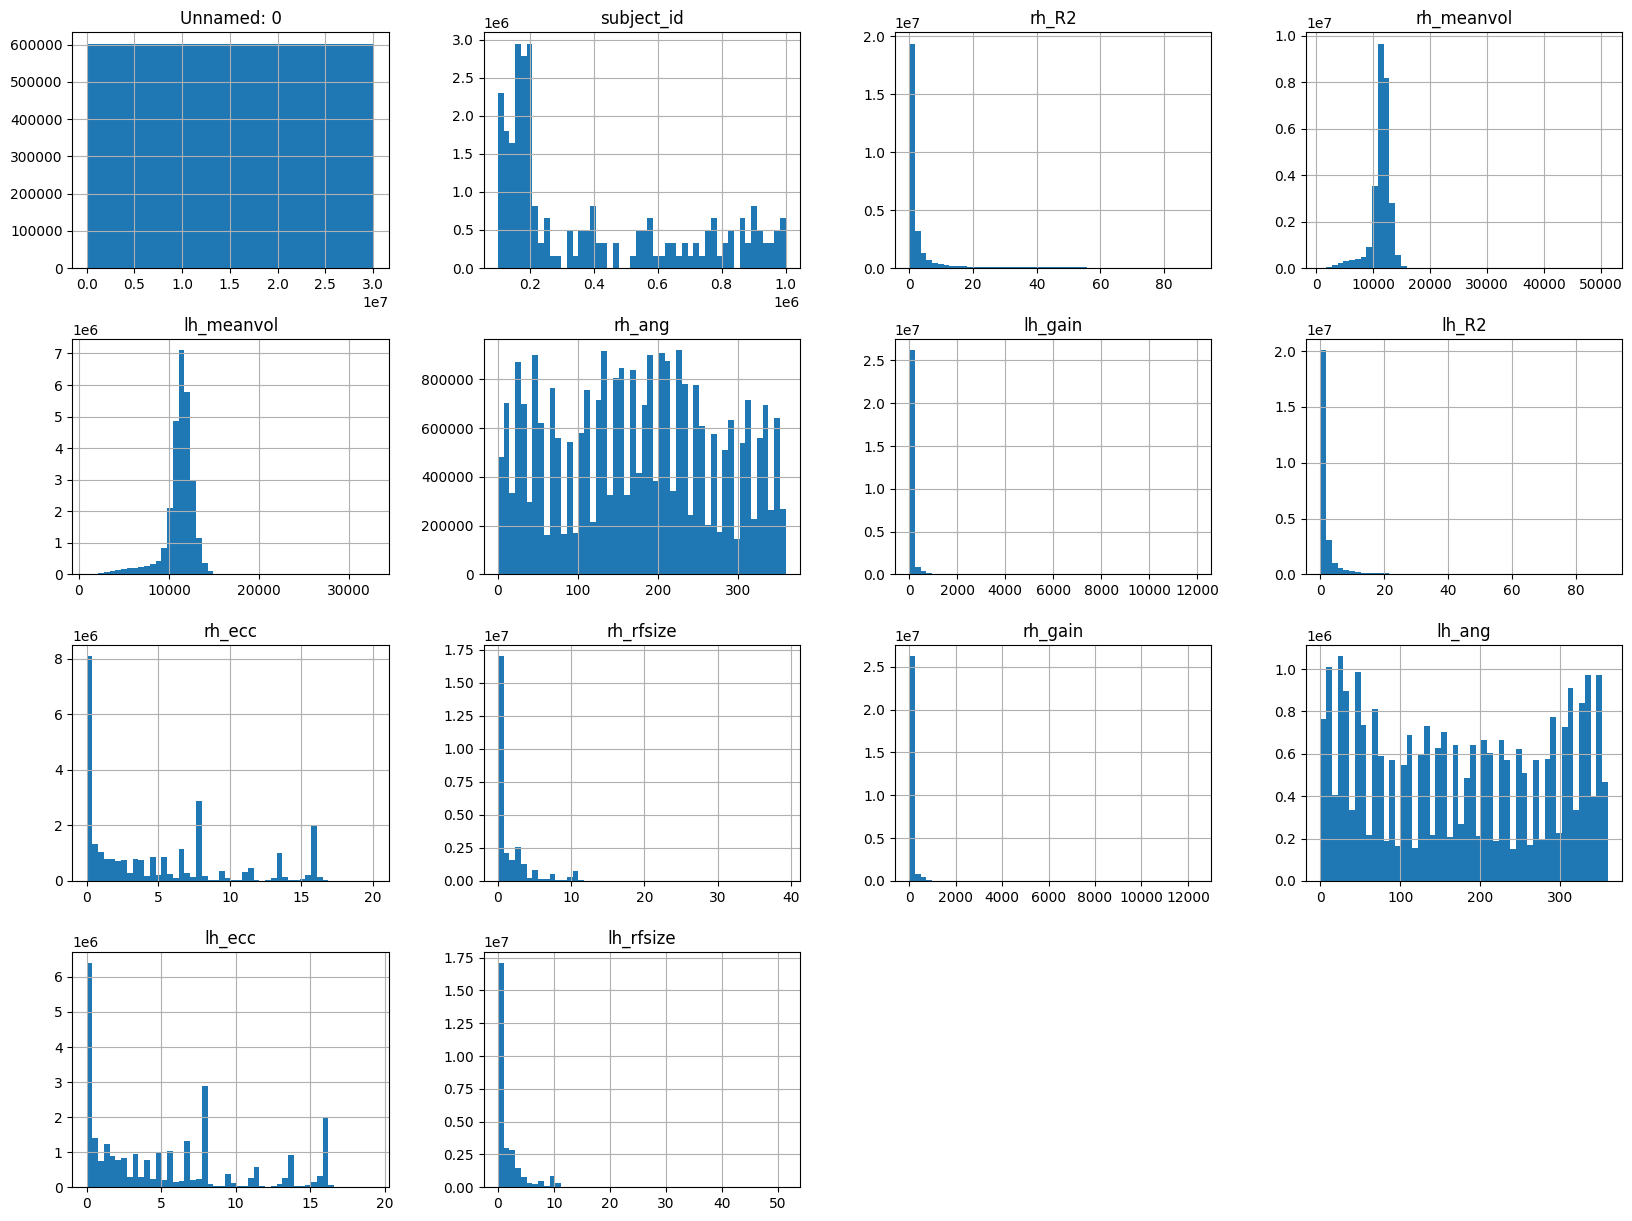

In [5]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))
plt.show()

KeyboardInterrupt: 

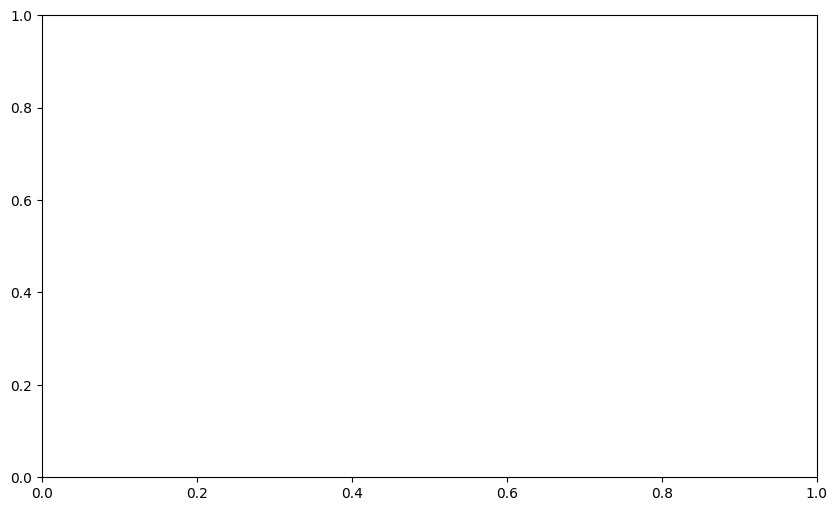

In [9]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

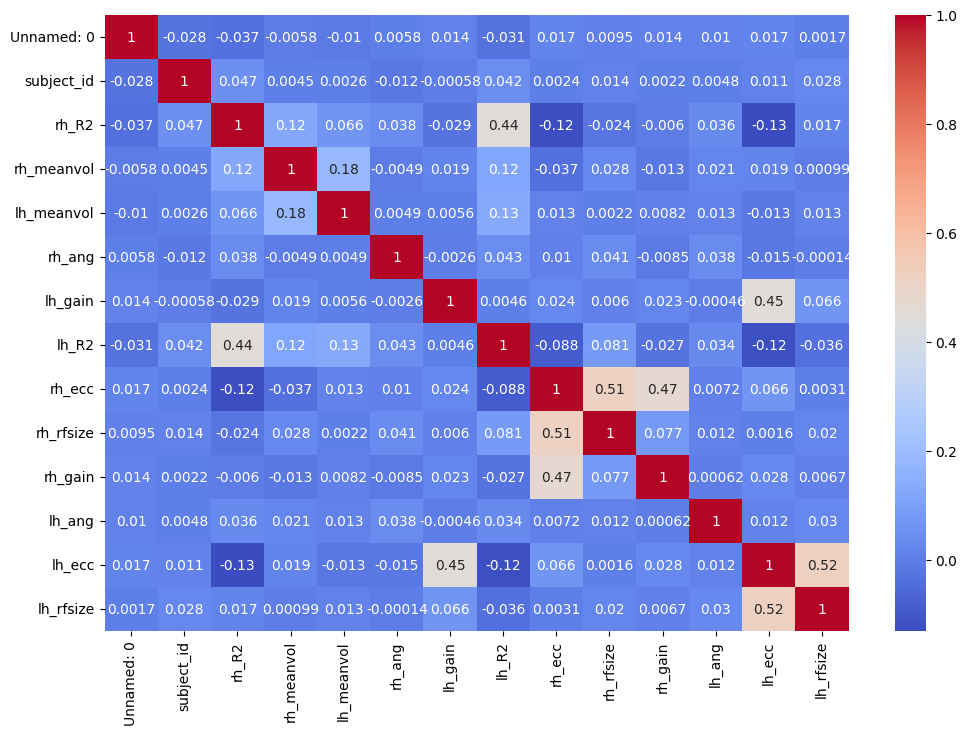

In [8]:
# correlation matrix

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Hemisphere Comparison

KeyboardInterrupt: 

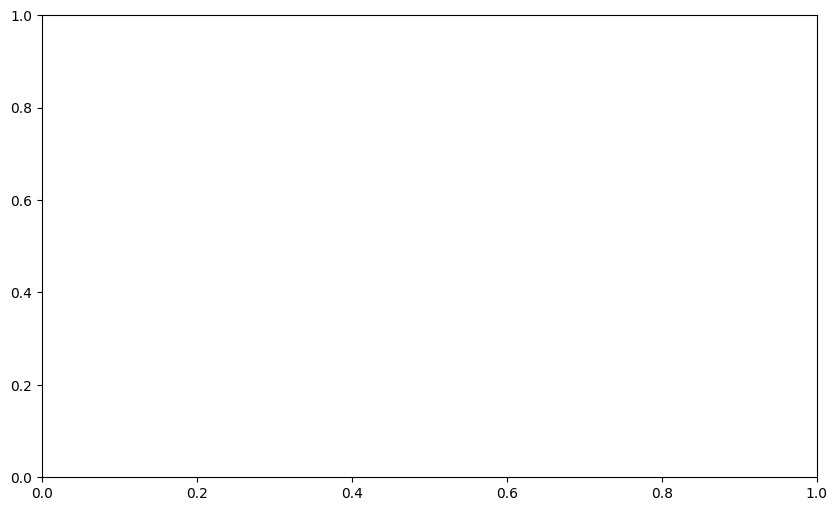

In [10]:
hemispheres = ['lh', 'rh']
measures = ['ang', 'ecc', 'gain', 'meanvol', 'R2', 'rfsize']

for measure in measures:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='subject_id', y=f'lh_{measure}', data=df, color='blue', label='LH')
    sns.boxplot(x='subject_id', y=f'rh_{measure}', data=df, color='red', label='RH')
    plt.xticks(rotation=90)
    plt.title(f'Comparación de {measure} entre Hemisferios')
    plt.legend()
    plt.show()

# Cluster Analysis

In [13]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Seleccionar las variables para el clustering
features = df[[f'{hemi}_{measure}' for hemi in hemispheres for measure in measures]]

# Escalar los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Agregar los clusters al DataFrame original
df['cluster'] = clusters

# Visualizar los clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lh_ang', y='lh_ecc', hue='cluster', data=df, palette='viridis')
plt.title('Clustering de Sujetos basado en ang y ecc del Hemisferio Izquierdo')
plt.show()


/var/folders/kb/xjgrybvs26qc31wnr88cf93w0000gn/T/ipykernel_13349/3794673301.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = clusters
/Users/mariedelvalle/Documents/projects/brain_lateralization_study/env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 